In [ ]:

import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/Data HIV.xlsx')

In [ ]:
df

,Continent,Code,Country,Period,Population,All Cases,Death
0,Eastern Mediterranean,AFG,Afghanistan,2000,19542982,4100.0,500.0
1,Eastern Mediterranean,AFG,Afghanistan,2001,19688632,4600.0,500.0
2,Eastern Mediterranean,AFG,Afghanistan,2002,21000256,5100.0,500.0
3,Eastern Mediterranean,AFG,Afghanistan,2003,22645130,5600.0,500.0
4,Eastern Mediterranean,AFG,Afghanistan,2004,23553551,6100.0,500.0
...,...,...,...,...,...,...,...
4411,Africa,ZWE,Zimbabwe,2018,15052184,1400000.0,25000.0
4412,Africa,ZWE,Zimbabwe,2019,15354608,1300000.0,24000.0
4413,Africa,ZWE,Zimbabwe,2020,15669666,1300000.0,23000.0
4414,Africa,ZWE,Zimbabwe,2021,15993524,1300000.0,21000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Continent   4416 non-null   object 
 1   Code        4416 non-null   object 
 2   Country     4416 non-null   object 
 3   Period      4416 non-null   int64  
 4   Population  4416 non-null   int64  
 5   All Cases   3327 non-null   float64
 6   Death       3301 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 241.6+ KB


In [ ]:
df["Population"] = df["Population"].astype("float64")
df["Period"] = df["Period"].astype("float64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Continent   4416 non-null   object 
 1   Code        4416 non-null   object 
 2   Country     4416 non-null   object 
 3   Period      4416 non-null   float64
 4   Population  4416 non-null   float64
 5   All Cases   3327 non-null   float64
 6   Death       3301 non-null   float64
dtypes: float64(4), object(3)
memory usage: 241.6+ KB


In [ ]:
df.isnull().count()

Continent     4416
Code          4416
Country       4416
Period        4416
Population    4416
All Cases     4416
Death         4416
dtype: int64

In [ ]:
df.describe()

,Period,Population,All Cases,Death
count,4416.000000,4.416000e+03,3.327000e+03,3301.000000
mean,2011.000000,3.655205e+07,1.739326e+05,6737.567404
std,6.634001,1.369239e+08,5.773890e+05,19773.284719
min,2000.000000,9.609000e+03,0.000000e+00,0.000000
25%,2005.000000,1.922572e+06,3.000000e+03,100.000000
50%,2011.000000,7.662004e+06,1.900000e+04,500.000000
75%,2017.000000,2.528662e+07,1.000000e+05,3800.000000
max,2022.000000,1.417173e+09,7.600000e+06,250000.000000


In [ ]:
negara = df['Country'].unique()
negara

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'G

In [ ]:
tahun = df['Period'].unique()
tahun

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021., 2022.])

In [ ]:
df2 = df[df['Country'] == 'Indonesia']
df2

,Continent,Code,Country,Period,Population,All Cases,Death
1794,South-East Asia,IDN,Indonesia,2000.0,214072421.0,60000.0,1200.0
1795,South-East Asia,IDN,Indonesia,2001.0,217112437.0,90000.0,1800.0
1796,South-East Asia,IDN,Indonesia,2002.0,220115092.0,130000.0,2700.0
1797,South-East Asia,IDN,Indonesia,2003.0,223080121.0,170000.0,3800.0
1798,South-East Asia,IDN,Indonesia,2004.0,225938595.0,210000.0,5300.0
1799,South-East Asia,IDN,Indonesia,2005.0,228805144.0,250000.0,7000.0
1800,South-East Asia,IDN,Indonesia,2006.0,231797427.0,290000.0,8600.0
1801,South-East Asia,IDN,Indonesia,2007.0,234858289.0,330000.0,10000.0
1802,South-East Asia,IDN,Indonesia,2008.0,237936543.0,370000.0,12000.0
1803,South-East Asia,IDN,Indonesia,2009.0,240981299.0,400000.0,14000.0


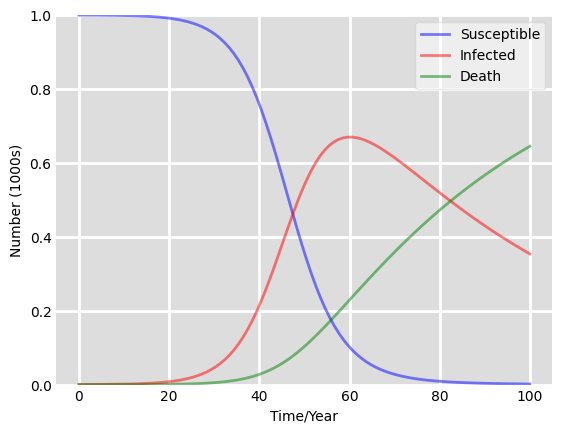

In [ ]:
# Menentukan Data Populasi
N = df2['Population'].iloc[-1]

# Menentuka Nilai Awal
I0 = df2["All Cases"].iloc[0] # Jumlah awal Individu terinveksi
R0 = df2["Death"].iloc[0] # Jumlah awal indoviu meninggal
S0 = N-I0-R0 # jumla populasi yang rentan terinveksi
y0 = S0, I0, R0

# Perkirakan nilai beta
Beta = 0.2 # estimasi nilai penularan
Gamma = R0/I0 # estimasi tingkat kematian

#Mendefinisikan model SIR
def sir(y, t,N, Beta, Gamma):
    S, I, R = y
    dSdt = -Beta * S * I / N
    dIdt = Beta * S * I / N - Gamma * I
    dRdt = Gamma * I
    return ([dSdt, dIdt, dRdt])

# Simulasi periode waktu
t = np.linspace(0, 100, 100)

# Solusi ODE
sol = odeint(sir, y0, t, args=(N, Beta, Gamma))
S, I, R = sol.T

# Visualisasi hasil
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N ,'b' , alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N ,'r' , alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N ,'g' , alpha=0.5, lw=2, label='Death')
ax.set_xlabel('Time/Year')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid( which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()